In [1]:
import random
from tqdm import tqdm
class Character:

    def __init__(self, agility =2 , strength = 2, hp = 4):
        self.agility = max(1,agility)
        self.strength = max(1,strength)
        self.full_hp = max(1,hp)
        self.hp = hp
        self.action = "def"

        self.def_prob = 50

        self.win_points = 0

    def copy(self):
        c1 =  Character(self.agility, self.strength, self.full_hp)
        c1.def_prob = self.def_prob
        c1.win_points = self.win_points
        return c1
    
    def get_agility(self, is_random = False):
        if is_random:
            return random.randint(1, self.agility)
        return self.agility
    
    def get_strength(self, is_random = False):
        if is_random:
            return random.randint(1, self.strength)
        return self.strength
    
    def is_random_upgrade(self):
        result = random.choice(["agility", "strength", "full_hp"])
        attr = getattr(self, result)
        attr+=1
        setattr(self, result, attr)
        self.hp = self.full_hp
    
    def restore(self):
        self.hp = self.full_hp
        

    def is_dead(self):
        return self.hp<=0
    
    def is_alive(self):
        return self.hp>0

    def is_random_behavior_change(self):
        delta = random.choice([-5, +5])
        self.def_prob+=delta
        if self.def_prob<0:
            self.def_prob = 0
        if self.def_prob>75:
            self.def_prob = 75
        

    def prepare_action(self):
        action_challenge = random.randint(0,100)
        self.action = "attack"
        if action_challenge<=self.def_prob:
            self.action = "def"

    def __str__(self):
        return str({
            "agility":self.agility,
            "strength":self.strength,
            "full_hp":self.full_hp,
            "def_prob":self.def_prob,
        })

    def __repr__(self):
        return str({
            "agility":self.agility,
            "strength":self.strength,
            "full_hp":self.full_hp,
            "def_prob":self.def_prob,
        })
    


In [2]:
class FightSolver:
    def solve(char1: Character, char2:Character, output = False, is_random = False):
        interaction = (char1.action, char2.action)
        c2_str = char2.get_strength(is_random)
        c2_ag = char2.get_agility(is_random)
        c1_str = char1.get_strength(is_random)
        c1_ag = char1.get_agility(is_random)

        match interaction:
            case ("def", "def"):
                pass
            case ("attack", "attack"):
                
                char1.hp-=c2_str
                
                char2.hp-=c1_str
                if char1.is_dead() and char2.is_dead():
                    if c1_ag>c2_ag:
                        char1.hp+=c2_str
                    if c2_ag>c1_ag:
                        char2.hp+=c1_str

            case ("attack", "def"):
                delta_hp = max(0, c1_str-c2_str)
                char2.hp-=delta_hp
            case ("def", "attack"):
                delta_hp = max(0, c2_str-c1_str)
                char1.hp-=delta_hp

        if output:
            print(interaction, char1.hp, char2.hp)


    def fight_round(char1: Character, char2:Character, output = False, is_random = False):
        char1.prepare_action()
        char2.prepare_action()
        FightSolver.solve(char1,char2,output,is_random)

    def fight(char1: Character, char2:Character, output = False, is_random = False):
        char1.restore()
        char2.restore()
        while char1.is_alive() and char2.is_alive():
            FightSolver.fight_round(char1, char2, output,is_random)

        if char1.is_alive():
            char1.win_points+=1

        if char2.is_alive():
            char2.win_points+=1

                


In [3]:
is_random = True
c1 = Character(agility=2, strength=2, hp=3)
c2 = Character(agility=2, strength=2, hp=3)

c1.def_prob = 50
c2.def_prob = 50
for i in range(100):
    c1.restore()
    c2.restore()
    FightSolver.fight(c1, c2, False,is_random)

print(f"c1 wins: {c1.win_points}, c2 wins: {c2.win_points}")



c1 wins: 43, c2 wins: 33


In [455]:
GENERATION_NUM = 100
FIGHTER_NUM = 100
fighters = [Character() for i in range(FIGHTER_NUM)]

for _ in tqdm(range(GENERATION_NUM)):
    for i,char1 in enumerate(fighters):
        fighters[i].win_points= 0
        fighters[i].is_random_upgrade()
        
    #группа все со всеми
    for i,char1 in enumerate(fighters):
        for j,char2 in enumerate(fighters):
            if i!=j:
                FightSolver.fight(fighters[i], fighters[j])
    #отсортировать по эффективности
    fighters = sorted(fighters, key=lambda x: x.win_points, reverse=True)

    for i in range(int(FIGHTER_NUM/2), FIGHTER_NUM):
        fighters[i] = fighters[i-int(FIGHTER_NUM/2)].copy()
        fighters[i].is_random_behavior_change()

    
    





  0%|          | 0/100 [00:00<?, ?it/s]

 95%|█████████▌| 95/100 [00:05<00:00, 17.46it/s]


KeyboardInterrupt: 

In [267]:
for f in fighters:
    print(f.win_points)

180
174
173
172
171
164
162
162
162
161
159
158
154
150
144
144
143
142
140
135
132
130
130
130
130
129
129
128
128
127
122
122
121
117
115
114
107
106
97
97
94
94
92
92
90
89
88
88
87
86
180
174
173
172
171
164
162
162
162
161
159
158
154
150
144
144
143
142
140
135
132
130
130
130
130
129
129
128
128
127
122
122
121
117
115
114
107
106
97
97
94
94
92
92
90
89
88
88
87
86


In [268]:
#print(str(fighters[0]), str(fighters[1]), str(fighters[-2]), str(fighters[-1]))
print(fighters[0],fighters[-1])
FightSolver.fight(fighters[0],fighters[-1], output = True)


{'agility': 132, 'strength': 123, 'full_hp': 144, 'def_prob': 0} {'agility': 131, 'strength': 123, 'full_hp': 142, 'def_prob': 35}
('attack', 'def') 144 142
('attack', 'attack') 21 19
('attack', 'attack') 21 -104


In [ ]:
from matplotlib import pyplot as plt
from typing import List
import numpy as np
from sklearn.preprocessing import normalize
def plot_scatter_fighters(fighters:List[Character]):
    A = np.array([f.strength for f in fighters])
    B = np.array([f.agility for f in fighters])
    C = np.array([f.win_points for f in fighters])
    
    plt.plot(A/np.linalg.norm(A))
    plt.plot(B/np.linalg.norm(B))
    plt.plot(C/np.linalg.norm(C))

    print(np.corrcoef(A,C))
    print(np.corrcoef(B,C))


[[1.         0.54654026]
 [0.54654026 1.        ]]
[[1.         0.50047218]
 [0.50047218 1.        ]]


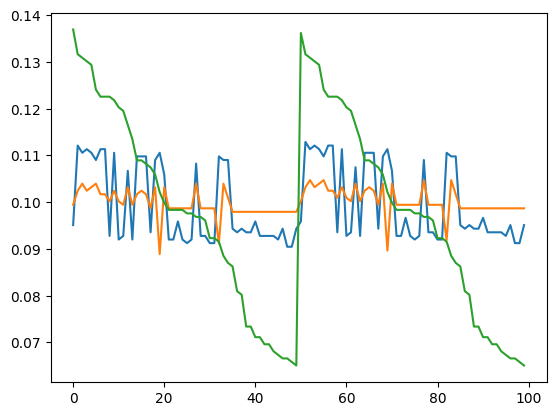

In [270]:
plot_scatter_fighters(fighters)


In [271]:
import itertools
def generate_challengers(N_iter):
    vectors = []
    for x in range(N_iter+1):          # x от 0 до 10
        for y in range(N_iter + 1 - x):  # y от 0 до (10 - x)
            z = 10 - x - y      # z вычисляется автоматически
            vectors.append([x, y, z])

    result = [Character(agility=v[0], strength=v[1], hp=v[2]) for v in vectors]
    return result

In [272]:
fighters2 = generate_challengers(10)

In [ ]:
FIGHTER_NUM = len(fighters2)
for _ in tqdm(range(GENERATION_NUM)):
    for i,char1 in enumerate(fighters2):
        fighters2[i].win_points= 0
        #fighters2[i].is_random_upgrade()
        #fighters2[i].is_random_behavior_change()
    #группа все со всеми
    for i,char1 in enumerate(fighters2):
        for j,char2 in enumerate(fighters2):
            if i!=j:
                FightSolver.fight(fighters2[i], fighters2[j])
    #отсортировать по эффективности
    fighters2 = sorted(fighters2, key=lambda x: x.win_points, reverse=True)

100%|██████████| 100/100 [00:02<00:00, 37.73it/s]


In [274]:
for f in fighters2:
    print(f.win_points)

92
90
90
88
88
88
87
87
87
85
83
83
83
82
82
82
81
81
79
79
78
78
77
76
76
76
76
76
75
74
74
70
69
68
66
65
64
63
63
62
62
61
59
58
55
55
53
50
43
43
42
40
38
37
35
31
28
27
25
22
21
15
13
12
11
8


[[1.         0.66408092]
 [0.66408092 1.        ]]
[[ 1.         -0.65659809]
 [-0.65659809  1.        ]]


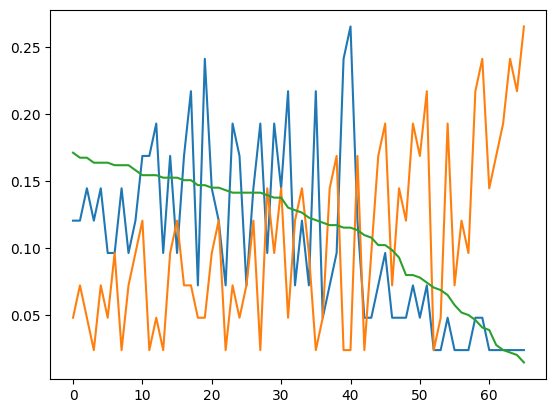

In [275]:
plot_scatter_fighters(fighters2)